In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
bigdata = pd.read_csv('BigData Filled.csv', sep=',', header = 0, index_col = 0)
smalldata = pd.read_csv('SmallData Filled.csv', sep=',', header = 0, index_col = 0)

In [4]:
bigdata

,Chronic KD,ProBNP (mean),SD (ProBNP),Potassium (mean),SD (Potassium),Diastolic BP (mean),SD (DBP),Respiratory Rate (mean),SD (RR),Platelet Count (mean),...,SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR),In-hospital mortality
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
107,0,3931.5,171.500000,4.541284,0.904952,50.697368,21.412625,16.929293,4.314066,139.642105,...,5.207128,8.637500,0.744319,1.875000,0.489260,17.183333,6.503952,61.112500,20.596866,0
165,1,833.5,441.500000,3.956338,0.456790,80.565217,10.499797,17.478261,2.356666,154.654545,...,2.581989,8.900000,0.547723,2.350000,0.250000,16.268750,5.464284,69.214286,15.487854,0
199,0,1812.0,271.000000,4.182353,0.452100,60.129630,9.351925,18.485876,3.581351,267.869565,...,2.766644,8.380000,0.231517,1.433333,0.324893,25.866667,7.923523,67.397436,30.084423,0
209,0,7850.0,0.000000,4.365625,0.426914,57.202247,11.011924,17.846154,5.738955,154.806452,...,3.162278,8.306667,0.765477,0.900000,0.000000,16.000000,1.042433,66.976562,23.866815,0
236,0,12036.0,1858.246665,4.298276,0.488485,57.386364,7.986397,16.515924,4.419997,68.776923,...,4.262237,8.036364,0.702298,1.860000,0.605310,12.368182,5.650775,74.376437,23.605616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99747,1,9124.0,0.000000,3.913333,0.513636,49.851064,7.855013,18.525253,5.236514,196.750000,...,2.770103,8.628571,0.406076,2.018248,0.764176,5.200000,0.000000,78.909091,13.161665,0
99814,0,1734.0,0.000000,3.988889,0.321263,37.480000,9.712343,18.400000,3.382307,330.444444,...,2.160247,8.442857,0.388613,0.900000,0.100000,15.633333,2.939766,65.000000,13.546217,0
99847,1,33779.0,0.000000,3.878261,0.288861,73.872340,13.739394,21.458333,3.834918,44.320000,...,2.231500,8.100000,0.374166,1.500000,0.000000,4.622222,2.187732,104.833333,14.758049,0


In [5]:
#There is still more than 20% missing data from diastolic BP, in order to analyze it's effect all patients without it will be removed (The entire column was removed from the smalldata df)
bigdata_filtered = bigdata.loc[~bigdata['Diastolic BP (mean)'].isna()]

amount = bigdata_filtered.count(axis=1)      #Get amount of non NaN values per row.
entries = np.where(amount > 25)     #Select rows which have more than 70% of entries.

bigdata_filtered = bigdata_filtered.iloc[entries]    #Grab only those entries from the df.
bigdata_filtered

,Chronic KD,ProBNP (mean),SD (ProBNP),Potassium (mean),SD (Potassium),Diastolic BP (mean),SD (DBP),Respiratory Rate (mean),SD (RR),Platelet Count (mean),...,SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR),In-hospital mortality
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
107,0,3931.5,171.500000,4.541284,0.904952,50.697368,21.412625,16.929293,4.314066,139.642105,...,5.207128,8.637500,0.744319,1.875000,0.489260,17.183333,6.503952,61.112500,20.596866,0
165,1,833.5,441.500000,3.956338,0.456790,80.565217,10.499797,17.478261,2.356666,154.654545,...,2.581989,8.900000,0.547723,2.350000,0.250000,16.268750,5.464284,69.214286,15.487854,0
199,0,1812.0,271.000000,4.182353,0.452100,60.129630,9.351925,18.485876,3.581351,267.869565,...,2.766644,8.380000,0.231517,1.433333,0.324893,25.866667,7.923523,67.397436,30.084423,0
209,0,7850.0,0.000000,4.365625,0.426914,57.202247,11.011924,17.846154,5.738955,154.806452,...,3.162278,8.306667,0.765477,0.900000,0.000000,16.000000,1.042433,66.976562,23.866815,0
236,0,12036.0,1858.246665,4.298276,0.488485,57.386364,7.986397,16.515924,4.419997,68.776923,...,4.262237,8.036364,0.702298,1.860000,0.605310,12.368182,5.650775,74.376437,23.605616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99747,1,9124.0,0.000000,3.913333,0.513636,49.851064,7.855013,18.525253,5.236514,196.750000,...,2.770103,8.628571,0.406076,2.018248,0.764176,5.200000,0.000000,78.909091,13.161665,0
99814,0,1734.0,0.000000,3.988889,0.321263,37.480000,9.712343,18.400000,3.382307,330.444444,...,2.160247,8.442857,0.388613,0.900000,0.100000,15.633333,2.939766,65.000000,13.546217,0
99847,1,33779.0,0.000000,3.878261,0.288861,73.872340,13.739394,21.458333,3.834918,44.320000,...,2.231500,8.100000,0.374166,1.500000,0.000000,4.622222,2.187732,104.833333,14.758049,0


In [6]:
amount = smalldata.count(axis=1)      #Get amount of non NaN values per row.
entries = np.where(amount > 22)       #Select rows which have more than 70% of entries.

smalldata_filtered = smalldata.iloc[entries]    #Grab only those entries from the df.
smalldata_filtered

,Chronic KD,Potassium (mean),SD (Potassium),Respiratory Rate (mean),SD (RR),Platelet Count (mean),SD (PC),Sodium (mean),SD (sodium),Urea Nitrogen (mean),...,SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR),In-hospital mortality
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
3,0,4.316667,0.643619,16.987879,5.798629,260.031250,83.932445,138.027027,3.258971,33.236842,...,4.171331,7.750000,0.829587,3.408333,2.536552,12.300000,5.292582,74.684783,45.299232,0
9,0,3.310000,0.333017,16.316062,2.605017,274.250000,34.175101,134.300000,3.348134,22.714286,...,1.479020,8.700000,0.650275,1.987500,0.590418,41.600000,0.000000,57.846154,37.734046,1
21,0,4.147917,0.492438,17.926230,4.542155,235.658537,77.111769,139.363636,3.134057,53.755556,...,5.436502,8.686364,1.118154,2.177778,0.755392,6.866667,2.908226,67.764706,39.504866,1
26,0,4.140000,0.297321,20.060000,2.907989,174.166667,12.824672,137.625000,2.446298,31.500000,...,1.118034,8.340000,0.287054,2.259983,0.809303,14.454593,4.063320,52.371429,26.813172,0
34,0,4.033333,0.268742,18.338462,4.977726,304.714286,37.381104,141.000000,1.414214,29.142857,...,2.315167,8.750000,0.229129,1.700000,0.000000,11.650000,0.250000,53.214286,24.950909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99938,1,4.078261,0.351341,21.575221,3.928127,198.466667,55.556418,129.842105,2.253959,23.421053,...,2.357023,8.500000,0.384708,1.350000,0.269258,19.100000,2.900000,83.761905,21.210685,0
99944,1,4.200000,0.591608,22.644860,4.160905,311.125000,27.057520,139.125000,2.204399,33.555556,...,1.414214,8.442857,0.306394,1.000000,0.000000,5.233333,0.946338,81.315789,18.417244,0
99982,0,3.875000,0.348454,16.654008,4.706414,123.612903,27.475124,135.681818,2.753285,28.536585,...,3.162278,8.977778,0.289742,1.740000,0.492341,17.500000,2.083267,86.980000,17.143440,0


In [7]:
bigdata_filled = bigdata_filtered.fillna(bigdata_filtered.mean())
bigdata_filled

,Chronic KD,ProBNP (mean),SD (ProBNP),Potassium (mean),SD (Potassium),Diastolic BP (mean),SD (DBP),Respiratory Rate (mean),SD (RR),Platelet Count (mean),...,SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR),In-hospital mortality
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
107,0,3931.5,171.500000,4.541284,0.904952,50.697368,21.412625,16.929293,4.314066,139.642105,...,5.207128,8.637500,0.744319,1.875000,0.489260,17.183333,6.503952,61.112500,20.596866,0
165,1,833.5,441.500000,3.956338,0.456790,80.565217,10.499797,17.478261,2.356666,154.654545,...,2.581989,8.900000,0.547723,2.350000,0.250000,16.268750,5.464284,69.214286,15.487854,0
199,0,1812.0,271.000000,4.182353,0.452100,60.129630,9.351925,18.485876,3.581351,267.869565,...,2.766644,8.380000,0.231517,1.433333,0.324893,25.866667,7.923523,67.397436,30.084423,0
209,0,7850.0,0.000000,4.365625,0.426914,57.202247,11.011924,17.846154,5.738955,154.806452,...,3.162278,8.306667,0.765477,0.900000,0.000000,16.000000,1.042433,66.976562,23.866815,0
236,0,12036.0,1858.246665,4.298276,0.488485,57.386364,7.986397,16.515924,4.419997,68.776923,...,4.262237,8.036364,0.702298,1.860000,0.605310,12.368182,5.650775,74.376437,23.605616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99747,1,9124.0,0.000000,3.913333,0.513636,49.851064,7.855013,18.525253,5.236514,196.750000,...,2.770103,8.628571,0.406076,2.018248,0.764176,5.200000,0.000000,78.909091,13.161665,0
99814,0,1734.0,0.000000,3.988889,0.321263,37.480000,9.712343,18.400000,3.382307,330.444444,...,2.160247,8.442857,0.388613,0.900000,0.100000,15.633333,2.939766,65.000000,13.546217,0
99847,1,33779.0,0.000000,3.878261,0.288861,73.872340,13.739394,21.458333,3.834918,44.320000,...,2.231500,8.100000,0.374166,1.500000,0.000000,4.622222,2.187732,104.833333,14.758049,0


In [8]:
smalldata_filled = smalldata_filtered.fillna(smalldata_filtered.mean())
smalldata_filled

,Chronic KD,Potassium (mean),SD (Potassium),Respiratory Rate (mean),SD (RR),Platelet Count (mean),SD (PC),Sodium (mean),SD (sodium),Urea Nitrogen (mean),...,SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR),In-hospital mortality
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
3,0,4.316667,0.643619,16.987879,5.798629,260.031250,83.932445,138.027027,3.258971,33.236842,...,4.171331,7.750000,0.829587,3.408333,2.536552,12.300000,5.292582,74.684783,45.299232,0
9,0,3.310000,0.333017,16.316062,2.605017,274.250000,34.175101,134.300000,3.348134,22.714286,...,1.479020,8.700000,0.650275,1.987500,0.590418,41.600000,0.000000,57.846154,37.734046,1
21,0,4.147917,0.492438,17.926230,4.542155,235.658537,77.111769,139.363636,3.134057,53.755556,...,5.436502,8.686364,1.118154,2.177778,0.755392,6.866667,2.908226,67.764706,39.504866,1
26,0,4.140000,0.297321,20.060000,2.907989,174.166667,12.824672,137.625000,2.446298,31.500000,...,1.118034,8.340000,0.287054,2.259983,0.809303,14.454593,4.063320,52.371429,26.813172,0
34,0,4.033333,0.268742,18.338462,4.977726,304.714286,37.381104,141.000000,1.414214,29.142857,...,2.315167,8.750000,0.229129,1.700000,0.000000,11.650000,0.250000,53.214286,24.950909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99938,1,4.078261,0.351341,21.575221,3.928127,198.466667,55.556418,129.842105,2.253959,23.421053,...,2.357023,8.500000,0.384708,1.350000,0.269258,19.100000,2.900000,83.761905,21.210685,0
99944,1,4.200000,0.591608,22.644860,4.160905,311.125000,27.057520,139.125000,2.204399,33.555556,...,1.414214,8.442857,0.306394,1.000000,0.000000,5.233333,0.946338,81.315789,18.417244,0
99982,0,3.875000,0.348454,16.654008,4.706414,123.612903,27.475124,135.681818,2.753285,28.536585,...,3.162278,8.977778,0.289742,1.740000,0.492341,17.500000,2.083267,86.980000,17.143440,0


In [9]:
print(bigdata_filled.skew())

Chronic KD                  0.315522
ProBNP (mean)               2.081676
SD (ProBNP)                 3.547358
Potassium (mean)            0.584313
SD (Potassium)              1.304487
Diastolic BP (mean)        16.508628
SD (DBP)                   14.778533
Respiratory Rate (mean)    42.174516
SD (RR)                    42.178181
Platelet Count (mean)       1.066550
SD (PC)                     1.598974
Sodium (mean)              -0.640529
SD (sodium)                 1.332720
Urea Nitrogen (mean)        1.372362
SD (UN)                     1.463062
Creatine Kinase (mean)     25.144392
SD (CK)                    21.677870
MCH (mean)                 -0.500802
SD (MCH)                    1.980129
PaCO2 (mean)                1.477332
SD (PaCO2)                  2.475870
Red Blood Cell (mean)       0.947680
SD (RBC)                    0.702449
WBC (mean)                  9.303330
SD (WBC)                    6.668459
Anion Gap (mean)            0.797906
SD (AG)                     1.601906
C

In [10]:
smalldata_filled.groupby('In-hospital mortality').count()

,Chronic KD,Potassium (mean),SD (Potassium),Respiratory Rate (mean),SD (RR),Platelet Count (mean),SD (PC),Sodium (mean),SD (sodium),Urea Nitrogen (mean),...,Anion Gap (mean),SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR)
In-hospital mortality,,,,,,,,,,,,,,,,,,,,,
0,7702,7702,7702,7702,7702,7702,7702,7702,7702,7702,...,7702,7702,7702,7702,7702,7702,7702,7702,7702,7702
1,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,...,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044


In [11]:
bigdata_filled.groupby('In-hospital mortality').count()

,Chronic KD,ProBNP (mean),SD (ProBNP),Potassium (mean),SD (Potassium),Diastolic BP (mean),SD (DBP),Respiratory Rate (mean),SD (RR),Platelet Count (mean),...,Anion Gap (mean),SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR)
In-hospital mortality,,,,,,,,,,,,,,,,,,,,,
0,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,...,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
1,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347


In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [13]:
sm = SMOTE()

# SMALL DATA

In [98]:
smalldata_labels = smalldata_filled["In-hospital mortality"]

In [99]:
sd_unlabeled = smalldata_filled.drop(columns=["In-hospital mortality"])

In [100]:
sd_unlabeled

,Chronic KD,Potassium (mean),SD (Potassium),Respiratory Rate (mean),SD (RR),Platelet Count (mean),SD (PC),Sodium (mean),SD (sodium),Urea Nitrogen (mean),...,Anion Gap (mean),SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR)
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
3,0,4.316667,0.643619,16.987879,5.798629,260.031250,83.932445,138.027027,3.258971,33.236842,...,16.000000,4.171331,7.750000,0.829587,3.408333,2.536552,12.300000,5.292582,74.684783,45.299232
9,0,3.310000,0.333017,16.316062,2.605017,274.250000,34.175101,134.300000,3.348134,22.714286,...,12.250000,1.479020,8.700000,0.650275,1.987500,0.590418,41.600000,0.000000,57.846154,37.734046
21,0,4.147917,0.492438,17.926230,4.542155,235.658537,77.111769,139.363636,3.134057,53.755556,...,18.333333,5.436502,8.686364,1.118154,2.177778,0.755392,6.866667,2.908226,67.764706,39.504866
26,0,4.140000,0.297321,20.060000,2.907989,174.166667,12.824672,137.625000,2.446298,31.500000,...,13.500000,1.118034,8.340000,0.287054,2.259983,0.809303,14.454593,4.063320,52.371429,26.813172
34,0,4.033333,0.268742,18.338462,4.977726,304.714286,37.381104,141.000000,1.414214,29.142857,...,12.800000,2.315167,8.750000,0.229129,1.700000,0.000000,11.650000,0.250000,53.214286,24.950909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99938,1,4.078261,0.351341,21.575221,3.928127,198.466667,55.556418,129.842105,2.253959,23.421053,...,12.666667,2.357023,8.500000,0.384708,1.350000,0.269258,19.100000,2.900000,83.761905,21.210685
99944,1,4.200000,0.591608,22.644860,4.160905,311.125000,27.057520,139.125000,2.204399,33.555556,...,15.000000,1.414214,8.442857,0.306394,1.000000,0.000000,5.233333,0.946338,81.315789,18.417244
99982,0,3.875000,0.348454,16.654008,4.706414,123.612903,27.475124,135.681818,2.753285,28.536585,...,12.000000,3.162278,8.977778,0.289742,1.740000,0.492341,17.500000,2.083267,86.980000,17.143440


In [101]:
X, y = sm.fit_resample(sd_unlabeled, smalldata_labels)

In [102]:
dataset = SelectKBest(f_classif, k="all").fit_transform(X, y)

In [103]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 7702, 1: 7702})


In [104]:
X_train, X_testOr, y_train, y_testOr = train_test_split(dataset, y, test_size=0.2)

In [105]:
X_val, X_test, y_val, y_test = train_test_split(X_testOr, y_testOr, test_size=0.5)

# SVM Model

In [22]:
clf = svm.SVC(kernel='rbf', gamma='auto', probability=True)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [23]:
y_pred_svm_proba_test = pipe.predict_proba(X_test)[:, 1]
y_pred_svm_test = pipe.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_test))
print("Precision:",metrics.precision_score(y_test, y_pred_svm_test))
print("Recall:",metrics.recall_score(y_test, y_pred_svm_test))

Accuracy: 0.8260869565217391
Precision: 0.8242894056847545
Recall: 0.8285714285714286


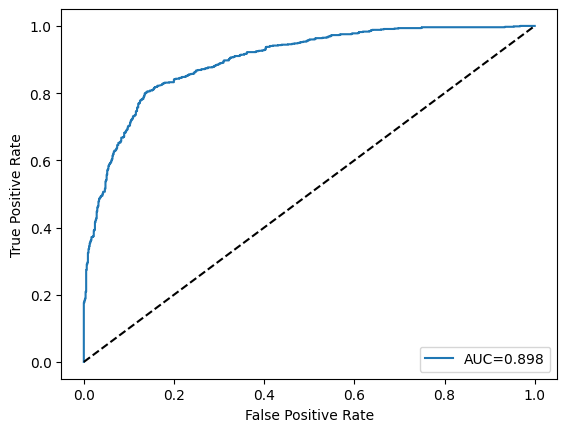

In [25]:
auc_svm_test = metrics.roc_auc_score(y_test, y_pred_svm_proba_test)
auc_svm_test = "{:.3f}".format(auc_svm_test)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba_test)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc_svm_test)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [26]:
print(classification_report(y_test, y_pred_svm_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       771
           1       0.82      0.83      0.83       770

    accuracy                           0.83      1541
   macro avg       0.83      0.83      0.83      1541
weighted avg       0.83      0.83      0.83      1541



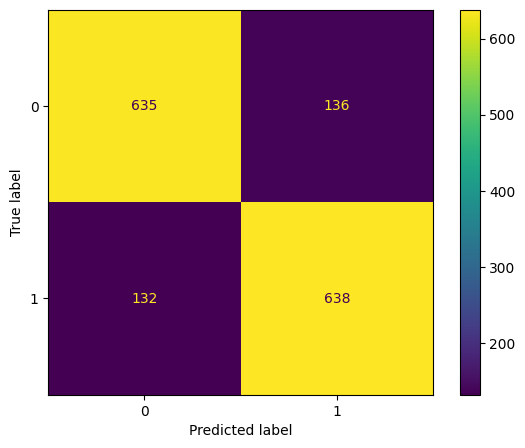

In [27]:
cm = confusion_matrix(y_test, y_pred_svm_test,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [28]:
y_pred_svm_val = pipe.predict(X_val)
y_pred_svm_val_proba = pipe.predict_proba(X_val)[:, 1]

In [29]:
y_pred_svm_proba_train = pipe.predict_proba(X_train)[:, 1]
y_pred_svm_train = pipe.predict(X_train)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_svm_val))
print("Precision:",metrics.precision_score(y_val, y_pred_svm_val))
print("Recall:",metrics.recall_score(y_val, y_pred_svm_val))

Accuracy: 0.811038961038961
Precision: 0.82125
Recall: 0.8161490683229814


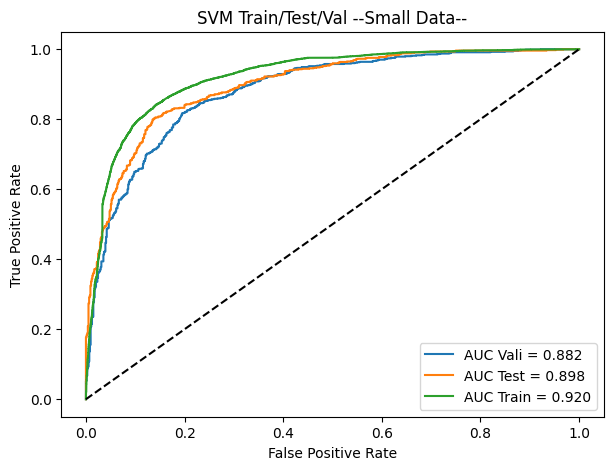

In [31]:
auc_svm_val = metrics.roc_auc_score(y_val, y_pred_svm_val_proba)
auc_svm_train = metrics.roc_auc_score(y_train, y_pred_svm_proba_train)

auc_svm_val  = "{:.3f}".format(auc_svm_val)
auc_svm_train = "{:.3f}".format(auc_svm_train)

fprSVCval, tprSVCval, _ = metrics.roc_curve(y_val, y_pred_svm_val_proba)
fprSVCtrain, tprSVCtrain, _ = metrics.roc_curve(y_train, y_pred_svm_proba_train)

plt.plot(fprSVCval, tprSVCval, label="AUC Vali = "+ auc_svm_val)
plt.plot(fprSVC, tprSVC, label="AUC Test = "+ auc_svm_test)
plt.plot(fprSVCtrain, tprSVCtrain, label="AUC Train = "+ auc_svm_train)

plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("SVM Train/Test/Val --Small Data--")
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [32]:
print(classification_report(y_val, y_pred_svm_val, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       735
           1       0.82      0.82      0.82       805

    accuracy                           0.81      1540
   macro avg       0.81      0.81      0.81      1540
weighted avg       0.81      0.81      0.81      1540



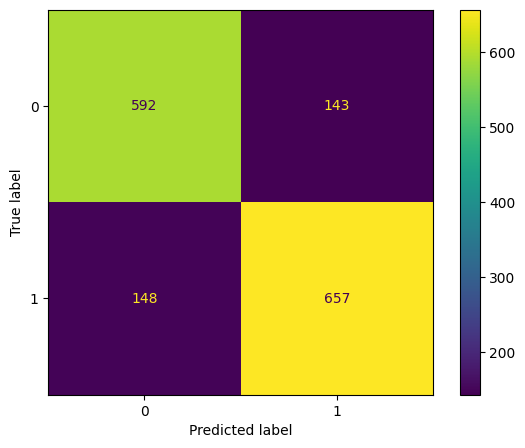

In [33]:
cm = confusion_matrix(y_val, y_pred_svm_val,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [34]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_bce = []
val_bce = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    clf = svm.SVC(kernel='rbf', gamma='auto')
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    bce_train = log_loss(y_trainval[train_indexes], y_hat_train_temp)
    bce_val = log_loss(y_trainval[val_indexes], y_hat_val_temp)
    
    # append the loss values to the lists
    train_bce.append(bce_train)
    val_bce.append(bce_val)
    
print(f"BCE Training: {round(bce_train, 3)}")
print(f"BCE Validation: {round(bce_val, 3)}")

BCE Training: 5.369
BCE Validation: 6.367


# Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=30,max_depth=10, random_state=42)
pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, n_estimators=30,
                                        random_state=42))])

In [36]:
y_predrf = pipe.predict(X_test)
y_predrf_proba = pipe.predict_proba(X_test)[:,1]

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision:",metrics.precision_score(y_test, y_predrf))
print("Recall:",metrics.recall_score(y_test, y_predrf))

Accuracy: 0.8345230369889682
Precision: 0.8366013071895425
Recall: 0.8311688311688312


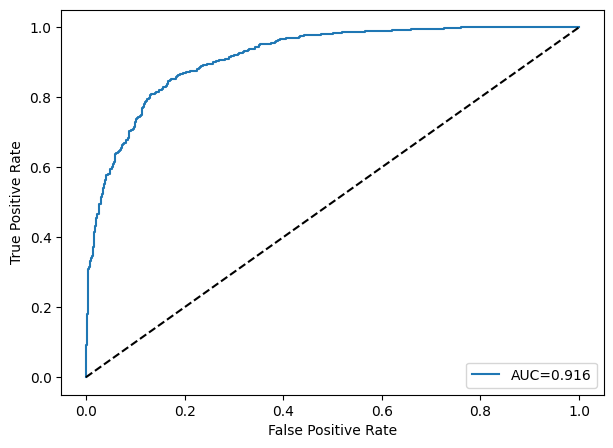

In [38]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [39]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       771
           1       0.84      0.83      0.83       770

    accuracy                           0.83      1541
   macro avg       0.83      0.83      0.83      1541
weighted avg       0.83      0.83      0.83      1541



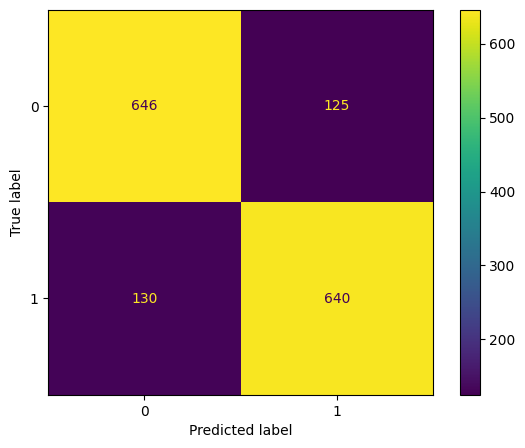

In [40]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [41]:
y_predrf_val = pipe.predict(X_val)
y_predrf_val_proba = pipe.predict_proba(X_val)[:,1]

In [42]:
y_predrf_train = pipe.predict(X_train)
y_predrf_train_proba = pipe.predict_proba(X_train)[:,1]

In [43]:
print("Accuracy:",metrics.accuracy_score(y_val, y_predrf_val))
print("Precision:",metrics.precision_score(y_val, y_predrf_val))
print("Recall:",metrics.recall_score(y_val, y_predrf_val))

Accuracy: 0.8220779220779221
Precision: 0.8356510745891277
Recall: 0.8211180124223603


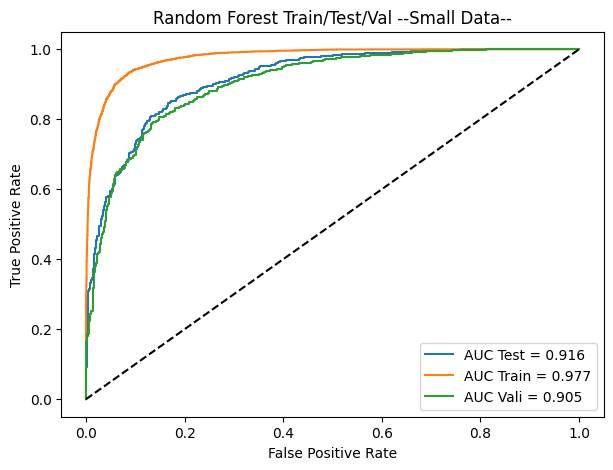

In [44]:
aucval = metrics.roc_auc_score(y_val, y_predrf_val_proba)
auctrain = metrics.roc_auc_score(y_train, y_predrf_train_proba)

aucval = "{:.3f}".format(aucval)
auctrain = "{:.3f}".format(auctrain)

fprRFval, tprRFval, _ = metrics.roc_curve(y_val, y_predrf_val_proba)
fprRFtrain, tprRFtrain, _ = metrics.roc_curve(y_train, y_predrf_train_proba)

plt.plot(fprRF, tprRF, label="AUC Test = "+ auc)
plt.plot(fprRFtrain, tprRFtrain, label="AUC Train = "+ auctrain)
plt.plot(fprRFval, tprRFval, label="AUC Vali = "+ aucval)

plt.title("Random Forest Train/Test/Val --Small Data--")
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [45]:
print(classification_report(y_val, y_predrf_val, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       735
           1       0.84      0.82      0.83       805

    accuracy                           0.82      1540
   macro avg       0.82      0.82      0.82      1540
weighted avg       0.82      0.82      0.82      1540



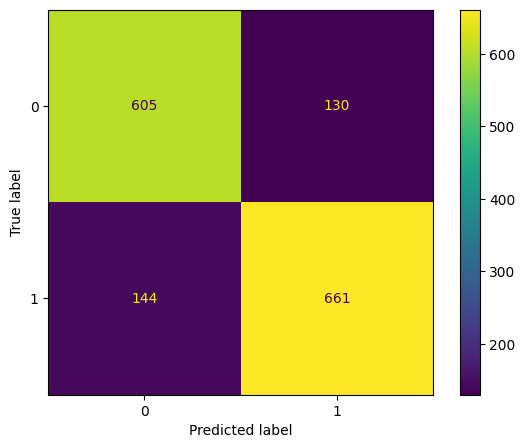

In [46]:
cm = confusion_matrix(y_val, y_predrf_val)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [106]:
n_inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(12, input_dim=n_inputs, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
1541/1541 [==============================] - 3s 2ms/step - loss: 1.4901 - accuracy: 0.5467
Epoch 2/50
1541/1541 [==============================] - 3s 2ms/step - loss: 0.6892 - accuracy: 0.6379
Epoch 3/50
1541/1541 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.6765
Epoch 4/50
1541/1541 [==============================] - 4s 3ms/step - loss: 0.5856 - accuracy: 0.7045
Epoch 5/50
1541/1541 [==============================] - 3s 2ms/step - loss: 0.5804 - accuracy: 0.7197
Epoch 6/50
1541/1541 [==============================] - 4s 3ms/step - loss: 0.5600 - accuracy: 0.7322
Epoch 7/50
1541/1541 [==============================] - 4s 2ms/step - loss: 0.5703 - accuracy: 0.7393
Epoch 8/50
1541/1541 [==============================] - 4s 2ms/step - loss: 0.5314 - accuracy: 0.7484
Epoch 9/50
1541/1541 [==============================] - 3s 2ms/step - loss: 0.5172 - accuracy: 0.7538
Epoch 10/50
1541/1541 [==============================] - 4s 3ms/step - loss: 0.513

In [114]:
y_nn = model.predict(X_test)

In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, y_nn.round()))
print("Precision:",metrics.precision_score(y_test, y_nn.round()))
print("Recall:",metrics.recall_score(y_test, y_nn.round()))

Accuracy: 0.7897469175859831
Precision: 0.7917737789203085
Recall: 0.7917737789203085


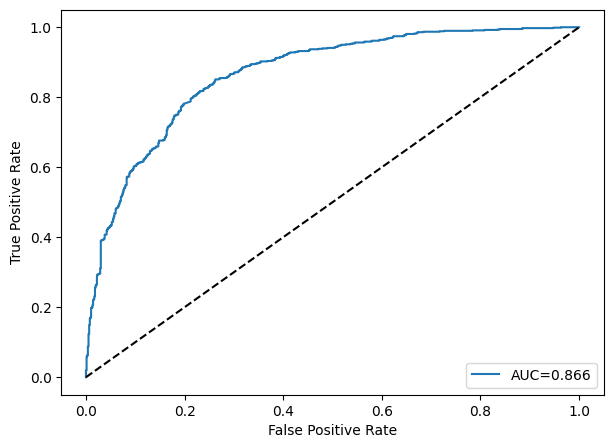

In [116]:
auc = metrics.roc_auc_score(y_test, y_nn)
auc = "{:.3f}".format(auc)
fprNN, tprNN, _ = metrics.roc_curve(y_test, y_nn)
plt.plot(fprNN, tprNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [117]:
print(classification_report(y_test, y_nn.round(), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       763
           1       0.79      0.79      0.79       778

    accuracy                           0.79      1541
   macro avg       0.79      0.79      0.79      1541
weighted avg       0.79      0.79      0.79      1541



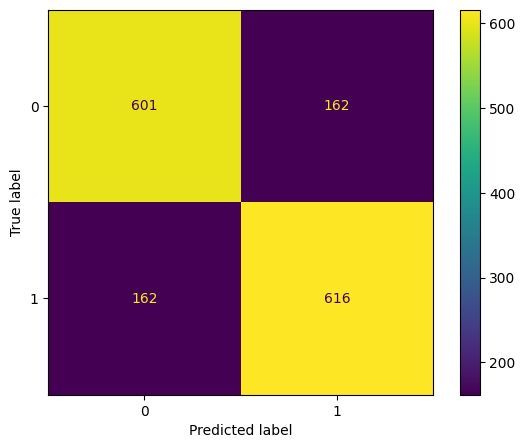

In [118]:
cm = confusion_matrix(y_test, y_nn.round())
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [119]:
y_nn_val = model.predict(X_val)
y_nn_train = model.predict(X_train)

In [120]:
print("Accuracy:",metrics.accuracy_score(y_val, y_nn_val.round()))
print("Precision:",metrics.precision_score(y_val, y_nn_val.round()))
print("Recall:",metrics.recall_score(y_val, y_nn_val.round()))

Accuracy: 0.7798701298701298
Precision: 0.7650200267022697
Recall: 0.7785326086956522


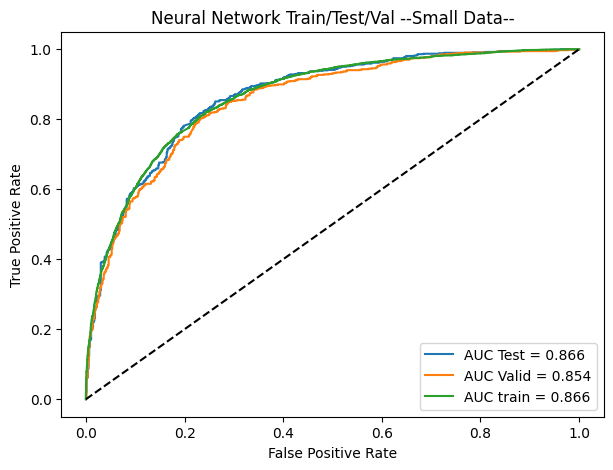

In [121]:
aucval = metrics.roc_auc_score(y_val, y_nn_val)
aucval = "{:.3f}".format(aucval)
auctrain = metrics.roc_auc_score(y_train, y_nn_train)
auctrain = "{:.3f}".format(auctrain)
fprNNval, tprNNval, _ = metrics.roc_curve(y_val, y_nn_val)
fprNNtrain, tprNNtrain, _ = metrics.roc_curve(y_train, y_nn_train)
plt.plot(fprNN, tprNN, label="AUC Test = "+ auc)
plt.plot(fprNNval, tprNNval, label="AUC Valid = "+ aucval)
plt.plot(fprNNtrain, tprNNtrain, label="AUC train = "+ auctrain)
plt.plot([0,1],[0,1], 'k--')
plt.title("Neural Network Train/Test/Val --Small Data--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [122]:
print(classification_report(y_val, y_nn_val.round(), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       804
           1       0.77      0.78      0.77       736

    accuracy                           0.78      1540
   macro avg       0.78      0.78      0.78      1540
weighted avg       0.78      0.78      0.78      1540



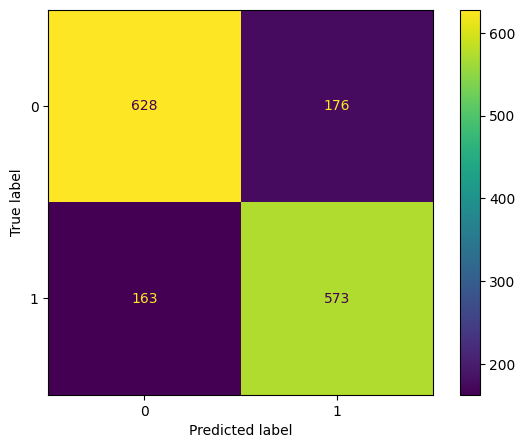

In [123]:
cm = confusion_matrix(y_val, y_nn_val.round())
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# BIG DATA

In [59]:
bigdata_labels = bigdata_filled["In-hospital mortality"]

In [60]:
bd_unlabeled = bigdata_filled.drop(columns=["In-hospital mortality"])

In [61]:
bd_unlabeled

,Chronic KD,ProBNP (mean),SD (ProBNP),Potassium (mean),SD (Potassium),Diastolic BP (mean),SD (DBP),Respiratory Rate (mean),SD (RR),Platelet Count (mean),...,Anion Gap (mean),SD (AG),Calcium (mean),SD (Calcium),Lactate (mean),SD (Lactate),Lymphocytes (mean),SD (Lymph),Heart Rate (mean),SD (HR)
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
107,0,3931.5,171.500000,4.541284,0.904952,50.697368,21.412625,16.929293,4.314066,139.642105,...,20.058824,5.207128,8.637500,0.744319,1.875000,0.489260,17.183333,6.503952,61.112500,20.596866
165,1,833.5,441.500000,3.956338,0.456790,80.565217,10.499797,17.478261,2.356666,154.654545,...,14.000000,2.581989,8.900000,0.547723,2.350000,0.250000,16.268750,5.464284,69.214286,15.487854
199,0,1812.0,271.000000,4.182353,0.452100,60.129630,9.351925,18.485876,3.581351,267.869565,...,15.111111,2.766644,8.380000,0.231517,1.433333,0.324893,25.866667,7.923523,67.397436,30.084423
209,0,7850.0,0.000000,4.365625,0.426914,57.202247,11.011924,17.846154,5.738955,154.806452,...,17.000000,3.162278,8.306667,0.765477,0.900000,0.000000,16.000000,1.042433,66.976562,23.866815
236,0,12036.0,1858.246665,4.298276,0.488485,57.386364,7.986397,16.515924,4.419997,68.776923,...,14.000000,4.262237,8.036364,0.702298,1.860000,0.605310,12.368182,5.650775,74.376437,23.605616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99747,1,9124.0,0.000000,3.913333,0.513636,49.851064,7.855013,18.525253,5.236514,196.750000,...,19.428571,2.770103,8.628571,0.406076,2.018248,0.764176,5.200000,0.000000,78.909091,13.161665
99814,0,1734.0,0.000000,3.988889,0.321263,37.480000,9.712343,18.400000,3.382307,330.444444,...,12.000000,2.160247,8.442857,0.388613,0.900000,0.100000,15.633333,2.939766,65.000000,13.546217
99847,1,33779.0,0.000000,3.878261,0.288861,73.872340,13.739394,21.458333,3.834918,44.320000,...,15.142857,2.231500,8.100000,0.374166,1.500000,0.000000,4.622222,2.187732,104.833333,14.758049


In [62]:
X, y = sm.fit_resample(bd_unlabeled, bigdata_labels)

In [63]:
dataset = SelectKBest(f_classif, k='all').fit_transform(X, y)

In [64]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 1432, 1: 1432})


In [65]:
X_train, X_testOr, y_train, y_testOr = train_test_split(dataset, y, test_size=0.2)

In [66]:
X_val, X_test, y_val, y_test = train_test_split(X_testOr, y_testOr, test_size=0.5)

# SVM Model

In [67]:
clf = svm.SVC(kernel='rbf', gamma='auto', probability=True)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [68]:
y_pred_svm_proba = pipe.predict_proba(X_test)[:, 1]
y_pred_svm = pipe.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8397212543554007
Precision: 0.8496732026143791
Recall: 0.8496732026143791


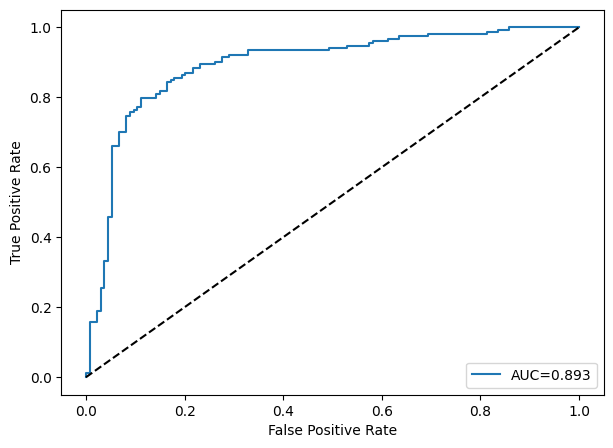

In [70]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [71]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       134
           1       0.85      0.85      0.85       153

    accuracy                           0.84       287
   macro avg       0.84      0.84      0.84       287
weighted avg       0.84      0.84      0.84       287



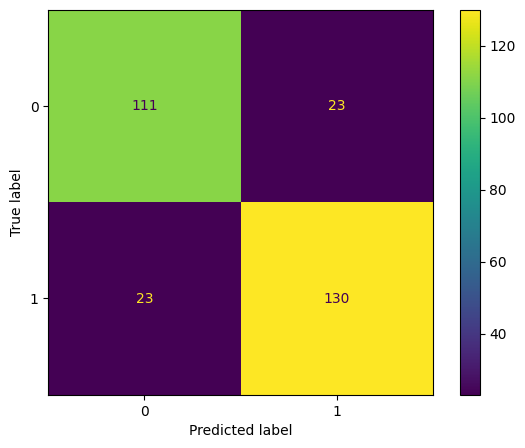

In [72]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [73]:
y_pred_svm_val_proba = pipe.predict_proba(X_val)[:, 1]
y_pred_svm_val = pipe.predict(X_val)

In [74]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_svm_val))
print("Precision:",metrics.precision_score(y_val, y_pred_svm_val))
print("Recall:",metrics.recall_score(y_val, y_pred_svm_val))

Accuracy: 0.8741258741258742
Precision: 0.8707482993197279
Recall: 0.8827586206896552


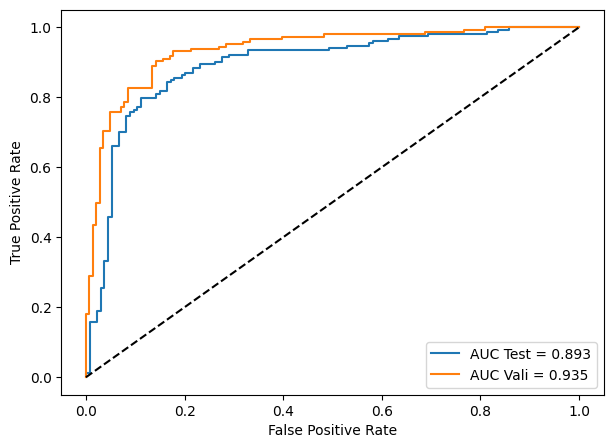

In [75]:
aucval = metrics.roc_auc_score(y_val, y_pred_svm_val_proba)
aucval = "{:.3f}".format(aucval)
fprSVCval, tprSVCval, _ = metrics.roc_curve(y_val, y_pred_svm_val_proba)
plt.plot(fprSVC, tprSVC, label="AUC Test = "+ auc)
plt.plot(fprSVCval, tprSVCval, label="AUC Vali = "+ aucval)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [76]:
print(classification_report(y_val, y_pred_svm_val, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       141
           1       0.87      0.88      0.88       145

    accuracy                           0.87       286
   macro avg       0.87      0.87      0.87       286
weighted avg       0.87      0.87      0.87       286



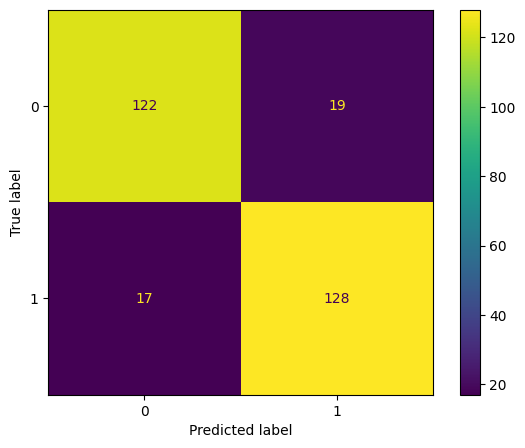

In [77]:
cm = confusion_matrix(y_val, y_pred_svm_val,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Random Forest

In [78]:
rf = RandomForestClassifier(n_estimators=30, random_state=42)
pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=30, random_state=42))])

In [79]:
y_predrf = pipe.predict(X_test)
y_predrf_proba = pipe.predict_proba(X_test)[:,1]

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision:",metrics.precision_score(y_test, y_predrf))
print("Recall:",metrics.recall_score(y_test, y_predrf))

Accuracy: 0.8362369337979094
Precision: 0.8581081081081081
Recall: 0.8300653594771242


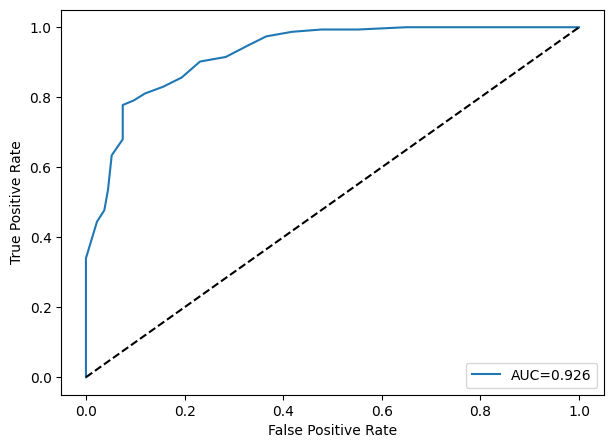

In [81]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [82]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       134
           1       0.86      0.83      0.84       153

    accuracy                           0.84       287
   macro avg       0.84      0.84      0.84       287
weighted avg       0.84      0.84      0.84       287



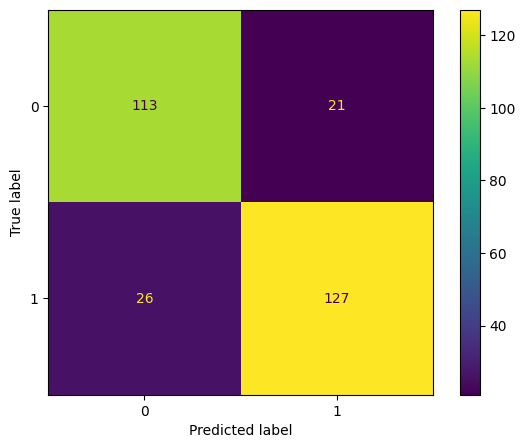

In [83]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [84]:
y_predrf_val = pipe.predict(X_val)
y_predrf_val_proba = pipe.predict_proba(X_val)[:,1]

In [85]:
print("Accuracy:",metrics.accuracy_score(y_val, y_predrf_val))
print("Precision:",metrics.precision_score(y_val, y_predrf_val))
print("Recall:",metrics.recall_score(y_val, y_predrf_val))

Accuracy: 0.8986013986013986
Precision: 0.8866666666666667
Recall: 0.9172413793103448


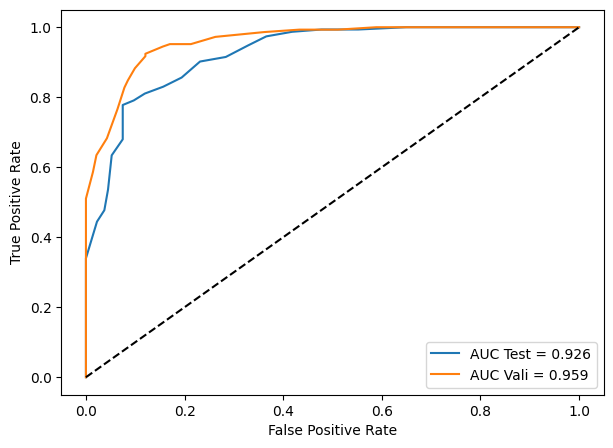

In [86]:
aucval = metrics.roc_auc_score(y_val, y_predrf_val_proba)
aucval = "{:.3f}".format(aucval)
fprRFval, tprRFval, _ = metrics.roc_curve(y_val, y_predrf_val_proba)
plt.plot(fprRF, tprRF, label="AUC Test = "+ auc)
plt.plot(fprRFval, tprRFval, label="AUC Vali = "+ aucval)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [87]:
print(classification_report(y_val, y_predrf_val, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       141
           1       0.89      0.92      0.90       145

    accuracy                           0.90       286
   macro avg       0.90      0.90      0.90       286
weighted avg       0.90      0.90      0.90       286



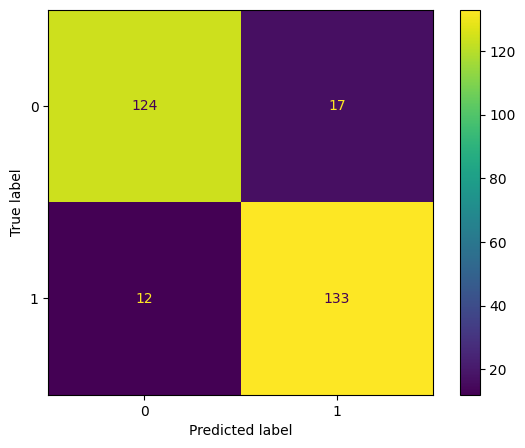

In [88]:
cm = confusion_matrix(y_val, y_predrf_val)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Neural Network

In [89]:
n_inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(12, input_dim=n_inputs, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
230/230 [==============================] - 1s 3ms/step - loss: 28.6133 - accuracy: 0.5015
Epoch 2/30
230/230 [==============================] - 1s 3ms/step - loss: 11.0187 - accuracy: 0.5290
Epoch 3/30
230/230 [==============================] - 1s 4ms/step - loss: 7.5338 - accuracy: 0.5426
Epoch 4/30
230/230 [==============================] - 1s 4ms/step - loss: 6.2181 - accuracy: 0.5334
Epoch 5/30
230/230 [==============================] - 1s 3ms/step - loss: 7.9601 - accuracy: 0.5613
Epoch 6/30
230/230 [==============================] - 1s 3ms/step - loss: 5.0747 - accuracy: 0.5853
Epoch 7/30
230/230 [==============================] - 1s 3ms/step - loss: 6.8440 - accuracy: 0.5775
Epoch 8/30
230/230 [==============================] - 1s 2ms/step - loss: 4.3761 - accuracy: 0.6107
Epoch 9/30
230/230 [==============================] - 1s 2ms/step - loss: 6.7042 - accuracy: 0.5823
Epoch 10/30
230/230 [==============================] - 1s 3ms/step - loss: 3.3885 - accuracy: 0.61

In [90]:
y_nn = model.predict(X_test)

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_nn.round()))
print("Precision:",metrics.precision_score(y_test, y_nn.round()))
print("Recall:",metrics.recall_score(y_test, y_nn.round()))

Accuracy: 0.6097560975609756
Precision: 0.6814159292035398
Recall: 0.5032679738562091


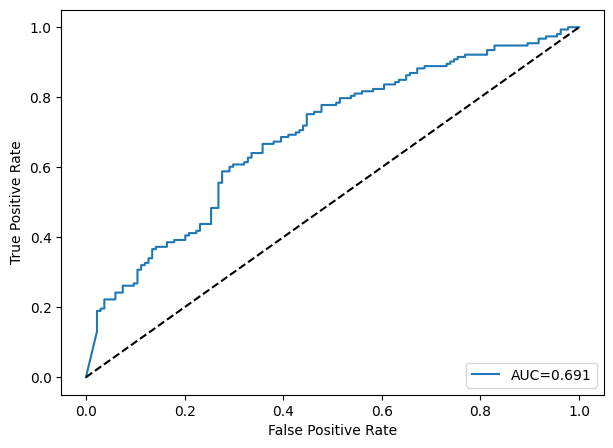

In [92]:
auc = metrics.roc_auc_score(y_test, y_nn)
auc = "{:.3f}".format(auc)
fprNN, tprNN, _ = metrics.roc_curve(y_test, y_nn)
plt.plot(fprNN, tprNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [93]:
print(classification_report(y_test, y_nn.round(), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       134
           1       0.68      0.50      0.58       153

    accuracy                           0.61       287
   macro avg       0.62      0.62      0.61       287
weighted avg       0.63      0.61      0.61       287



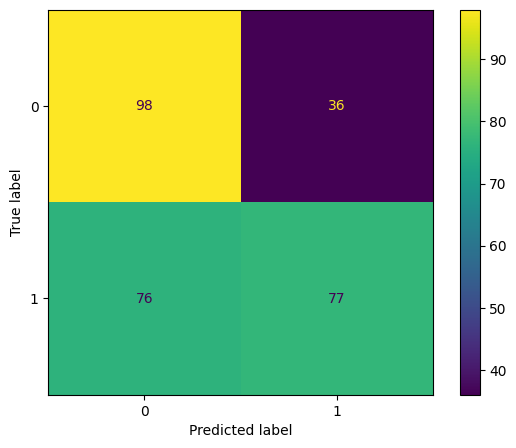

In [94]:
cm = confusion_matrix(y_test, y_nn.round())
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Validation

In [95]:
y_nn_val = model.predict(X_val)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_val, y_nn_val.round()))
print("Precision:",metrics.precision_score(y_val, y_nn_val.round()))
print("Recall:",metrics.recall_score(y_val, y_nn_val.round()))

Accuracy: 0.6783216783216783
Precision: 0.7304347826086957
Recall: 0.5793103448275863


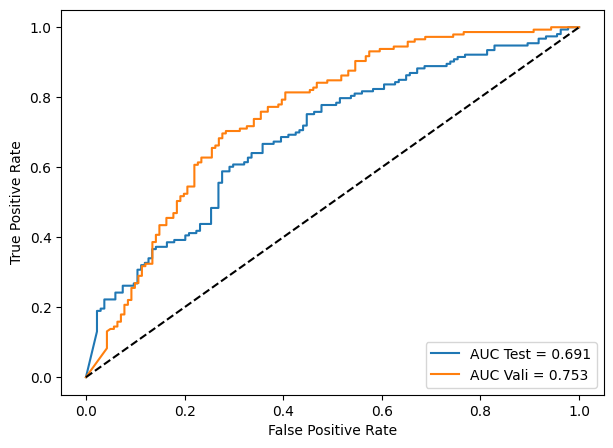

In [97]:
aucval = metrics.roc_auc_score(y_val, y_nn_val)
aucval = "{:.3f}".format(aucval)
fprNNval, tprNNval, _ = metrics.roc_curve(y_val, y_nn_val)
plt.plot(fprNN, tprNN, label="AUC Test = "+ auc)
plt.plot(fprNNval, tprNNval, label="AUC Vali = "+ aucval)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()